https://www.kaggle.com/santoshd3/bank-customers?select=Churn+Modeling.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pycaret

     |████████████████████████████████| 256kB 22.5MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 14.2MB 239kB/s 
     |████████████████████████████████| 276kB 52.8MB/s 
     |████████████████████████████████| 1.8MB 48.8MB/s 
     |████████████████████████████████| 6.8MB 41.0MB/s 
     |████████████████████████████████| 174kB 51.1MB/s 
     |████████████████████████████████| 65.8MB 42kB/s 
     |████████████████████████████████| 266kB 53.8MB/s 
     |████████████████████████████████| 1.6MB 43.0MB/s 
     |████████████████████████████████| 157.5MB 46kB/s 
     |████████████████████████████████| 2.1MB 42.5MB/s 
     |████████████████████████████████| 153kB 38.6MB/s 
     |████████████████████████████████| 1.1MB 51.5MB/s 
     |████████████████████████████████| 163kB 48.8MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 337kB 54.0MB/s 
     |████████████████████████████████| 61kB 10.4M

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/youtube/Churn Modeling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
def data_sampling(dataset, frac: float, random_seed: int):
    data_sampled_a = dataset.sample(frac=frac, random_state=random_seed)
    data_sampled_b =  dataset.drop(data_sampled_a.index).reset_index(drop=True)
    data_sampled_a.reset_index(drop=True, inplace=True)
    return data_sampled_a, data_sampled_b

In [7]:
data, data_unseen = data_sampling(dataset, 0.9, 123)
print("The number of samples for Unseen Data.",data_unseen.shape[0])

The number of samples for Unseen Data. 1000


In [8]:
from pycaret.classification import *
clf = setup(data=data, target="Exited", session_id=123, ignore_features=["Surname","RowNumber","CustomerId"], 
                normalize=True,
                feature_selection=True, remove_outliers=True,
                remove_multicollinearity=True, fix_imbalance=True,
                transformation=True, ignore_low_variance=True, pca=True,
                experiment_name="customer-churn-prediction",
                log_experiment=True)

,Description,Value
0,session_id,123
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(9000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
top_model = compare_models(fold=5,
                            sort="F1",
                            n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8041,0.8313,0.6793,0.4707,0.5560,0.4357,0.4478,3.698
catboost,CatBoost Classifier,0.8295,0.8269,0.5876,0.5243,0.5541,0.4492,0.4503,6.880
lightgbm,Light Gradient Boosting Machine,0.8259,0.8245,0.5755,0.5156,0.5437,0.4366,0.4377,0.338
ada,Ada Boost Classifier,0.7813,0.8174,0.6775,0.4327,0.5280,0.3947,0.4115,0.874
rf,Random Forest Classifier,0.8272,0.8200,0.5283,0.5214,0.5244,0.4189,0.4192,2.478
svm,SVM - Linear Kernel,0.7627,0.0000,0.7220,0.4122,0.5241,0.3820,0.4088,0.074
lr,Logistic Regression,0.7520,0.8221,0.7442,0.3990,0.5194,0.3721,0.4051,0.536
xgboost,Extreme Gradient Boosting,0.8230,0.8093,0.5246,0.5091,0.5166,0.4084,0.4085,4.672
ridge,Ridge Classifier,0.7433,0.0000,0.7507,0.3899,0.5132,0.3617,0.3976,0.046
lda,Linear Discriminant Analysis,0.7433,0.8220,0.7507,0.3899,0.5132,0.3617,0.3976,0.062


In [11]:
tuned_model = tune_model(estimator=top_model, fold=5,
                         optimize="F1", choose_better=True,
                         verbose=False)

In [12]:
plot_model(tuned_model, plot="parameter")

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,deviance
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None


In [13]:
bagged_model = ensemble_model(tuned_model, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7928,0.8158,0.6713,0.4503,0.5390,0.4120,0.4257
1,0.8170,0.8727,0.7176,0.4952,0.5860,0.4736,0.4870
2,0.7987,0.8247,0.6667,0.4601,0.5444,0.4207,0.4326
3,0.7937,0.8207,0.6620,0.4511,0.5366,0.4099,0.4224
4,0.8135,0.8457,0.6837,0.4868,0.5687,0.4540,0.4647
Mean,0.8031,0.8359,0.6803,0.4687,0.5549,0.4341,0.4465
SD,0.0102,0.0210,0.0200,0.0187,0.0193,0.0253,0.0252


In [14]:
boosted_model = ensemble_model(tuned_model, fold=5,
                               method="Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7818,0.5278,0.4750,0.5000,0.3828,0.3836
1,0.8363,0.8429,0.6250,0.5400,0.5794,0.4784,0.4804
2,0.8304,0.8116,0.5880,0.5270,0.5558,0.4514,0.4524
3,0.8079,0.7948,0.5185,0.4706,0.4934,0.3752,0.3759
4,0.8152,0.8233,0.5581,0.4878,0.5206,0.4068,0.4082
Mean,0.8199,0.8109,0.5635,0.5001,0.5298,0.4189,0.4201
SD,0.0114,0.0214,0.0393,0.0282,0.0330,0.0399,0.0403


In [15]:
blended_model = blend_models(estimator_list=[tuned_model, boosted_model],
                            fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8045,0.8121,0.6481,0.4698,0.5447,0.4243,0.4332
1,0.8254,0.8651,0.6898,0.5120,0.5878,0.4801,0.4887
2,0.8079,0.8199,0.6620,0.4767,0.5543,0.4359,0.4455
3,0.7945,0.8151,0.6296,0.4503,0.5251,0.3985,0.4077
4,0.8186,0.8395,0.6605,0.4965,0.5669,0.4550,0.4624
Mean,0.8102,0.8303,0.6580,0.4811,0.5557,0.4388,0.4475
SD,0.0108,0.0198,0.0197,0.0214,0.0210,0.0276,0.0272


In [16]:
best_model = blended_model
plot_model(best_model, plot="parameter")
print(f"Model: {type(best_model)}")

,Parameters
estimators,"[('gbc', GradientBoostingClassifier(ccp_alpha=..."
flatten_transform,True
n_jobs,-1
verbose,False
voting,soft
weights,"[1, 1]"
weight_0,1
weight_1,1


Model: <class 'pycaret.internal.tunable.TunableVotingClassifier'>


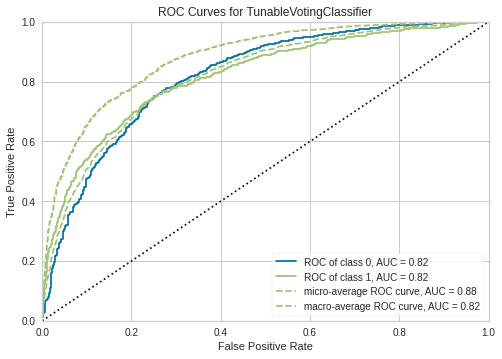

In [17]:
plot_model(best_model, plot="auc")

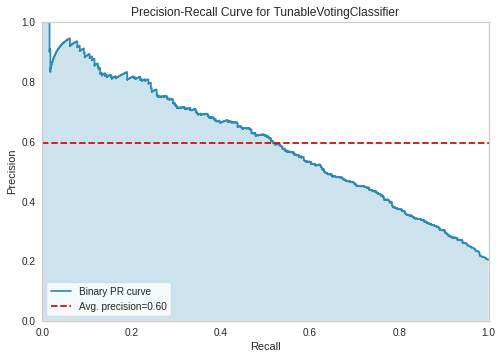

In [18]:
plot_model(best_model, plot="pr")

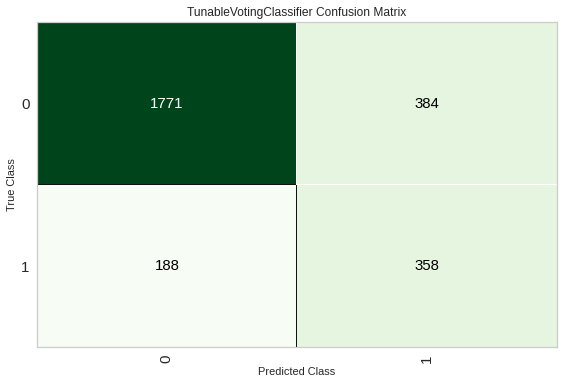

In [19]:
plot_model(best_model, plot="confusion_matrix")

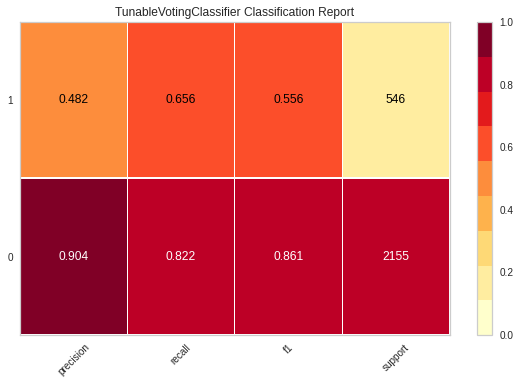

In [20]:
plot_model(best_model, plot="class_report")

In [21]:
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7882,0.8179,0.6557,0.4825,0.5559,0.4211,0.4296


In [22]:
final_model = finalize_model(best_model)

In [23]:
# Calculate scores with Test/Unseen labeled data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

def test_score_report(data_unseen, predict_unseen):
    le = LabelEncoder()
    data_unseen["Label"] = le.fit_transform(data_unseen.Exited.values)
    data_unseen["Label"] = data_unseen["Label"].astype(int)
    accuracy = accuracy_score(data_unseen["Label"], predict_unseen["Label"])
    roc_auc = roc_auc_score(data_unseen["Label"], predict_unseen["Label"])
    precision = precision_score(data_unseen["Label"], predict_unseen["Label"])
    recall = recall_score(data_unseen["Label"], predict_unseen["Label"])
    f1 = f1_score(data_unseen["Label"], predict_unseen["Label"])

    df_unseen = pd.DataFrame({
        "Accuracy" : [accuracy],
        "AUC" : [roc_auc],
        "Recall" : [recall],
        "Precision" : [precision],
        "F1 Score" : [f1]
    })
    return df_unseen

In [24]:
# Confusion Matrix
def conf_mat(data_unseen, predict_unseen):
    unique_label = data_unseen["Label"].unique()
    cmtx = pd.DataFrame(
        confusion_matrix(data_unseen["Label"],
                         predict_unseen["Label"],
                         labels=unique_label), 
        index=['{:}'.format(x) for x in unique_label], 
        columns=['{:}'.format(x) for x in unique_label]
    )
    ax = sns.heatmap(cmtx, annot=True, fmt="d", cmap="YlGnBu")
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Target');
    ax.set_title("Predict Unseen Confusion Matrix", size=14);
  

 Accuracy       AUC    Recall  Precision  F1 Score
    0.787  0.742081  0.663551   0.501767  0.571429


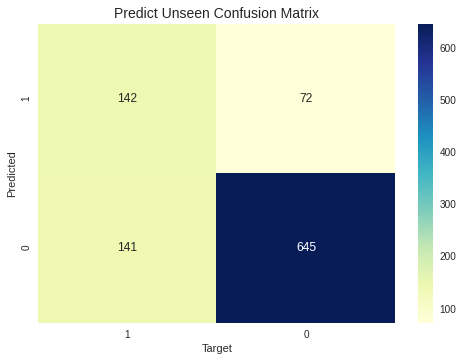

In [25]:
predict_unseen = predict_model(final_model, data=data_unseen);
score_unseen = test_score_report(data_unseen, predict_unseen)
print(score_unseen.to_string(index=False))
conf_mat(data_unseen, predict_unseen)

In [26]:
save_model(final_model,'Churn_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Surname', 'RowNumber',
                                                        'CustomerId'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Exited',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_...
                                                                                                                    min_weight_fraction_leaf=0.0,
                                                                 

In [27]:
predict_unseen[['Exited','Label','Score']].head(100)

,Exited,Label,Score
0,1,1,0.7529
1,0,0,0.8585
2,1,1,0.6535
3,0,0,0.7544
4,0,0,0.7089
...,...,...,...
95,0,0,0.5159
96,0,0,0.8064
97,1,1,0.6866
98,0,0,0.5987
